# FixU Student

## Library

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Data Wrangling

### Gathering Data

In [2]:
# Read CSV
df = pd.read_csv('https://raw.githubusercontent.com/7innovations/FixU-Machine-Learning/refs/heads/main/dataset/depression.csv')

In [3]:
# Display dataframe
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


### Assessing Data

In [4]:
# Show summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

In [5]:
# Check missing values
df.isna().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

In [6]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

### Cleaning Data

In [7]:
# Drop columns
df = df.drop(columns=[
    'Name', 
    'City', 
    'Working Professional or Student', 
    'Profession', 
    'Work Pressure', 
    'CGPA', 
    'Job Satisfaction', 
    'Degree'
])

In [8]:
# Rename columns
df.rename(columns={
    'Work/Study Hours': 'Study Hours',
}, inplace=True)

In [9]:
# Drop missing values
df = df.dropna()

In [10]:
# Check missing values
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [11]:
# Show summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 17 to 2555
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: float6

## Data Preprocessing

### Mapping

In [12]:
# Mapping categorical varibles
df['Gender'] = df['Gender'].map({
    'Female': 0, 
    'Male': 1
})

df['Sleep Duration'] = df['Sleep Duration'].map({
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3
})

df['Dietary Habits'] = df['Dietary Habits'].map({
    'Unhealthy': 0, 
    'Moderate': 1, 
    'Healthy': 2
})

df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({
    'No': 0, 
    'Yes': 1
})

df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({
    'No': 0, 
    'Yes': 1
})

df['Depression'] = df['Depression'].map({
    'No': 0,
    'Yes': 1
})

In [13]:
# Change data types
df = df.astype(int)

In [14]:
# Display dataframe
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
17,1,28,2,4,2,1,1,9,2,1,0
19,1,28,4,5,1,2,1,7,1,1,0
28,1,25,1,3,1,0,1,10,4,0,1
33,1,23,1,4,3,0,1,7,2,1,0
35,0,31,1,5,3,2,1,4,2,1,0


### Data Spliting

In [15]:
# Split data
target = 'Depression'
features = df.columns.difference([target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Modeling

### Artificial Neural Network (ANN) Model

In [16]:
# Create ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5087 - loss: 3.0570 - val_accuracy: 0.7228 - val_loss: 0.5671
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5373 - loss: 2.4713 - val_accuracy: 0.7426 - val_loss: 0.4864
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5927 - loss: 1.8941 - val_accuracy: 0.8317 - val_loss: 0.3985
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6046 - loss: 1.4368 - val_accuracy: 0.6931 - val_loss: 0.6267
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6138 - loss: 1.3363 - val_accuracy: 0.8218 - val_loss: 0.3905
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6162 - loss: 1.2171 - val_accuracy: 0.8020 - val_loss: 0.4133
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6398 - loss: 1.0645 - val_accuracy: 0.8416 - val_loss: 0.3912
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6494 - loss: 0.9169 - val_accuracy: 0.8317 - 

## Model Evaluation

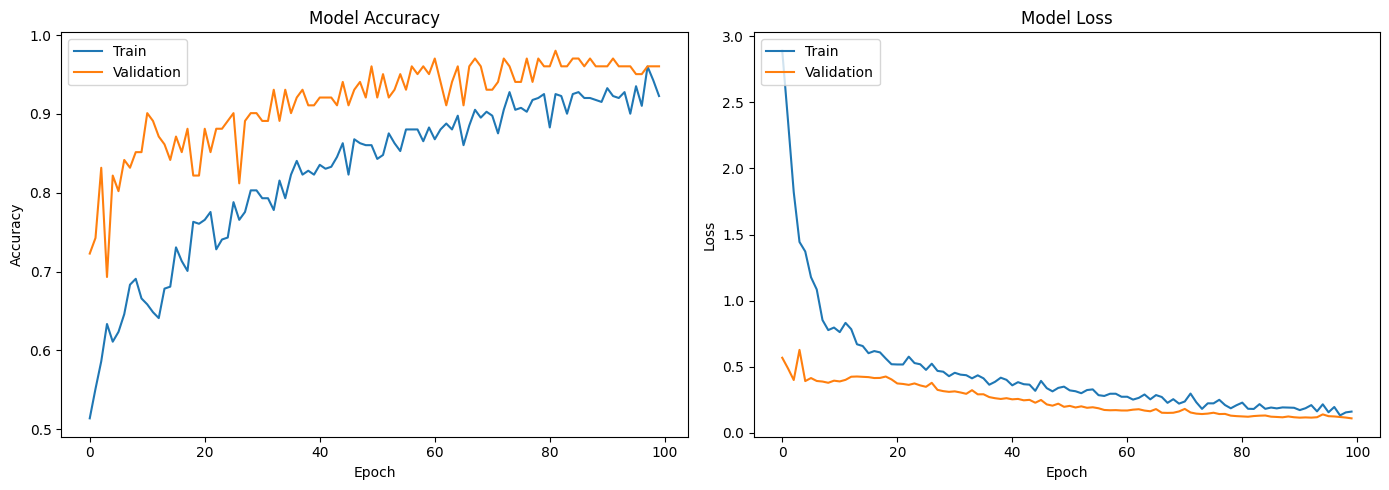

In [17]:
# Evaluate model
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
# Classification report
y_pred_test = (model.predict(X_test) > 0.5).astype(int).ravel()

report = classification_report(
    y_test, y_pred_test,
    target_names=['No Depression', 'Depression']
)

print(report)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
               precision    recall  f1-score   support

No Depression       0.98      0.94      0.96        48
   Depression       0.95      0.98      0.96        53

     accuracy                           0.96       101
    macro avg       0.96      0.96      0.96       101
 weighted avg       0.96      0.96      0.96       101



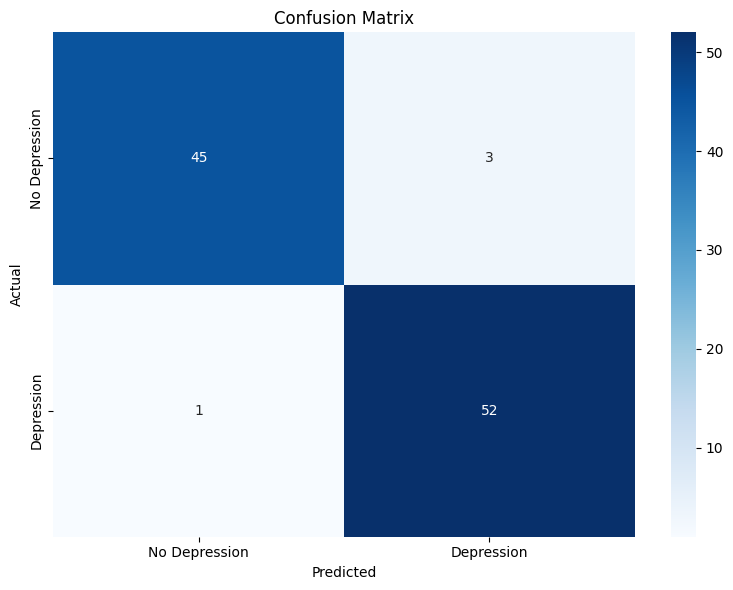

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
labels = ['No Depression', 'Depression']

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=labels, yticklabels=labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

## Prediction

In [20]:
# Predict new data
new_data = np.array([
    [1, 20, 3, 3, 7, 1, 0, 3, 1, 0],
    [1, 21, 4, 2, 8, 0, 0, 2, 3, 0]
])

predictions = model.predict(new_data)

for i, prob in enumerate(predictions, 1):
    predicted_class = int(prob[0] > 0.5)
    print(f"Data {i}:")
    print(f"Predicted Probability: {prob[0]:.10f}")
    print(f"Predicted: {predicted_class}")
    print('-' * 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Data 1:
Predicted Probability: 0.2989044189
Predicted: 0
------------------------------
Data 2:
Predicted Probability: 0.1151551828
Predicted: 0
------------------------------


## Save Model

In [21]:
# Save model
model.save('../backend/models/ann_student.h5')